# Hidden Markov Model

HMM models allows us to estimate the hidden Markov states (unobservable state), which is often used as regime change

- E.g. regime change in financial market => regime is an unobservable state, we can only observe the market price
- HMM models enables us to estimate the hidden state given sequence of observed market price / volatility

### Assumotions
1. Markov assumptions: $P(q_i|q_1...q_{i-1}) = P(q_i|q_{i-1})$
2. Output independence: $P(o_i|q_1...q_{i},o_1...o_{i-1}) = P(o_i|q_i)$

### Three classes of problem
1. Given observations $X$, model parameters $\pi,A,\theta$ => estimate probability of observations
2. Given observations $X$, model parameters $\pi,A,\theta$ => estimate optimal set of hidden states Z that causes X
3. Given only observations $X$, determine optimal set of model parameters $\pi,A,\theta$ which maximize $P(X|\pi,A,\theta)$

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.gridspec import GridSpec
from datetime import datetime, timedelta
from hmmlearn import hmm
from pandas.tseries.offsets import BDay
from scipy.optimize import minimize
from tqdm import tqdm

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.4f}'.format

[*********************100%***********************]  1 of 1 completed


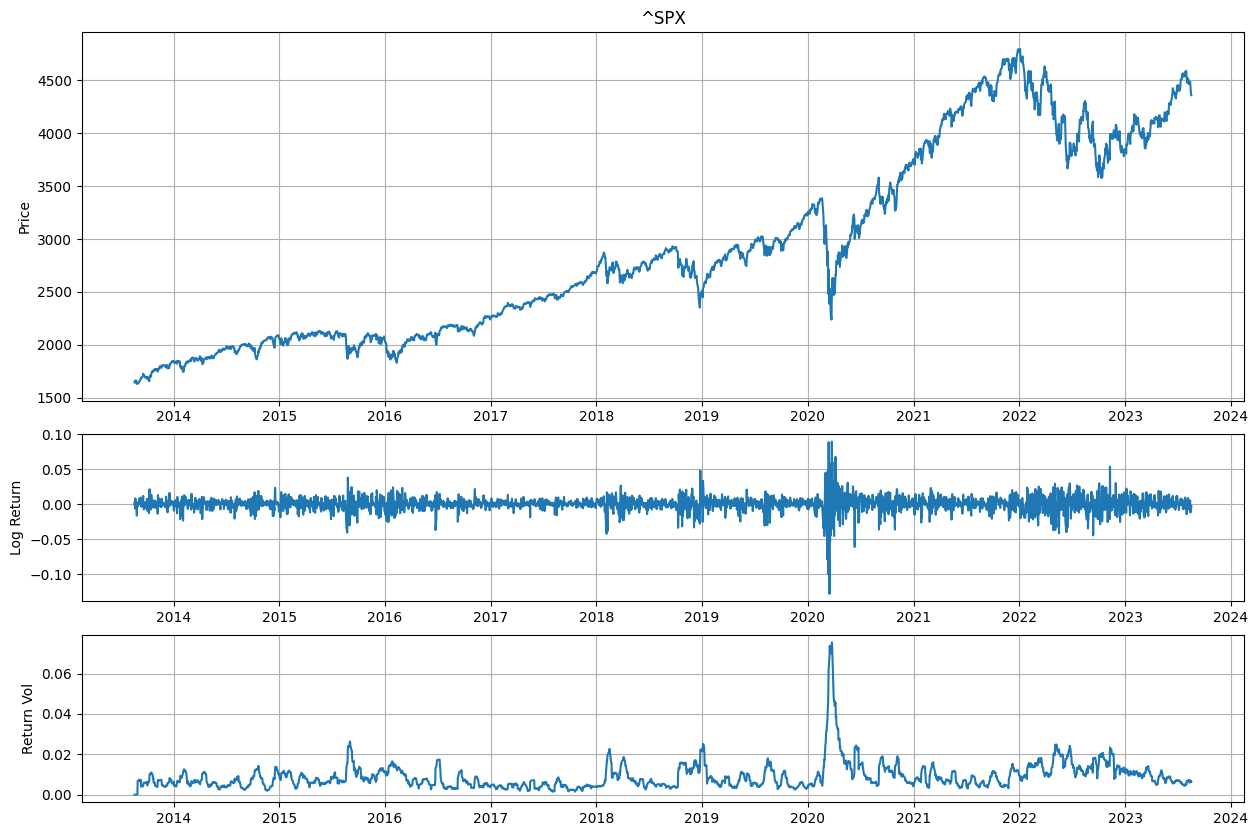

In [2]:
ticker = '^SPX'
df = yf.download(tickers=ticker,period="10y",interval="1d",auto_adjust=True).reset_index()
df['Return'] = (np.log(df['Close'] / df['Close'].shift(1))).fillna(0)
df['Return_vol'] = df['Return'].rolling(10).std().fillna(0)

gs = GridSpec(4, 1)
plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0:2,:])
ax.plot(df['Date'], df['Close'])
ax.set_ylabel('Price')
ax.set_title(ticker)
ax.grid()

ax = plt.subplot(gs[2,:])
ax.plot(df['Date'], df['Return'])
ax.set_ylabel('Log Return')
ax.grid()

ax = plt.subplot(gs[3,:])
ax.plot(df['Date'], df['Return_vol'])
ax.set_ylabel('Return Vol')
ax.grid()
plt.show()

### HMM Model to use daily return and trailing 10days return volatility as input to predict regime 

In [3]:
hidden_states = 3
em_iter = 1000
X = list(zip(df['Return'].values, df['Return_vol']))

model = hmm.GaussianHMM(n_components = hidden_states, covariance_type="full", n_iter=em_iter, random_state=42);
model.fit(X)
states = model.predict(X)

Model is not converging.  Current: 19489.34976786515 is not greater than 19492.65955165332. Delta is -3.3097837881687155


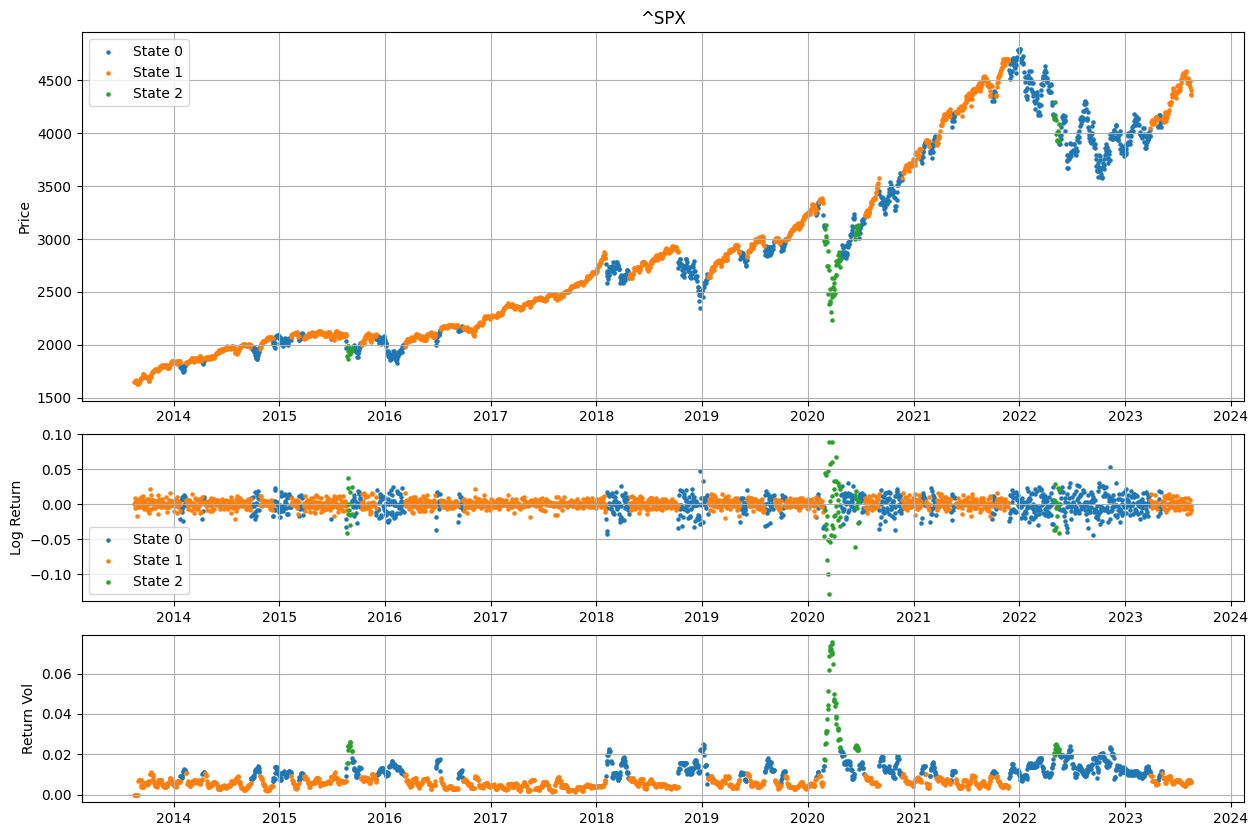

In [4]:
dates = df['Date'].values
prices = df['Close'].values
returns = df['Return'].values
returns_vol = df['Return_vol'].values

gs = GridSpec(4, 1)
plt.figure(figsize=(15,10))

ax = plt.subplot(gs[0:2,:])
for state in sorted(np.unique(states)):  
    x = dates[states==state]
    y = prices[states==state]    
    ax.scatter(x, y, label=f'State {state}', s=5)              
ax.set_ylabel('Price')
ax.set_title(ticker)
ax.legend()
ax.grid()

ax = plt.subplot(gs[2,:])
for state in sorted(np.unique(states)):  
    x = dates[states==state]
    y = returns[states==state]    
    ax.scatter(x, y, label=f'State {state}', s=5)              
ax.set_ylabel('Log Return')
ax.grid()
ax.legend()

ax = plt.subplot(gs[3,:])
for state in sorted(np.unique(states)):  
    x = dates[states==state]
    y = returns_vol[states==state] 
    ax.scatter(x, y, label=f'State {state}', s=5)                  
ax.set_ylabel('Return Vol')
ax.grid()
plt.show()